In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import *
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.utils import check_array
from sklearn.cluster import AgglomerativeClustering
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
import nltk
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy import sparse
import functools
import re
import missingno as mns
import warnings


pd.set_option('display.max_columns', 300)
nltk.download('stopwords')
stop_words=stopwords.words('english')
warnings.filterwarnings('ignore')

#statsmodels.api as sm (read on how to use this module)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Read Data

In [7]:
#clinvar_data = pd.read_csv('../input/clinvar-conflicting/clinvar_conflicting.csv')
clinvar_data = pd.read_csv('clinvar_conflicting.csv',low_memory=False)

In [8]:
clinvar_data.head()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,CLNDNINCL,CLNHGVS,CLNSIGINCL,CLNVC,CLNVI,MC,ORIGIN,SSR,CLASS,Allele,Consequence,IMPACT,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,DISTANCE,STRAND,BAM_EDIT,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.1168180G>C,NaN,single_nucleotide_variant,UniProtKB_(protein):Q96L58#VAR_059317,SO:0001583|missense_variant,1,NaN,0,C,missense_variant,MODERATE,B3GALT6,Transcript,NM_080605.3,protein_coding,1/1,NaN,552,522,174,E/D,gaG/gaC,NaN,1.0,NaN,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,NaN,NC_000001.10:g.1470752G>A,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:616101.0001|UniProtKB_(pr...,SO:0001583|missense_variant,1,NaN,0,A,missense_variant,MODERATE,TMEM240,Transcript,NM_001114748.1,protein_coding,4/4,NaN,523,509,170,P/L,cCg/cTg,NaN,-1.0,OK,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,NaN,NC_000001.10:g.1737942A>G,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:139380.0002|UniProtKB_(pr...,"SO:0001583|missense_variant,SO:0001623|5_prime...",35,NaN,1,G,missense_variant,MODERATE,GNB1,Transcript,NM_002074.4,protein_coding,6/12,NaN,632,239,80,I/T,aTc/aCc,NaN,-1.0,OK,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,NaN,NC_000001.10:g.2160305G>A,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0004|UniProtKB_(pr...,SO:0001583|missense_variant,33,NaN,0,A,missense_variant,MODERATE,SKI,Transcript,XM_005244775.1,protein_coding,1/7,NaN,132,100,34,G/S,Ggc/Agc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,NaN,NC_000001.10:g.2160305G>T,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0005|UniProtKB_(pr...,SO:0001583|missense_variant,33,NaN,0,T,missense_variant,MODERATE,SKI,Transcript,XM_005244775.1,protein_coding,1/7,NaN,132,100,34,G/C,Ggc/Tgc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0


# Data Cleaning

In [9]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total NaN Values', 'Percentage of NaN Values'])

missing_data(clinvar_data)

,Total NaN Values,Percentage of NaN Values
MOTIF_SCORE_CHANGE,65186,99.996932
HIGH_INF_POS,65186,99.996932
MOTIF_POS,65186,99.996932
MOTIF_NAME,65186,99.996932
DISTANCE,65080,99.834325
SSR,65058,99.800577
CLNSIGINCL,65021,99.743818
CLNDNINCL,65021,99.743818
CLNDISDBINCL,65021,99.743818
INTRON,56385,86.495981


In [10]:
class FixChromosome(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.comment_ = 'Transform \'CHROM\' feature to a numerical feature. Assign X = 23, MT = 24'
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()

        X_copy.loc[:, 'CHROM'].replace('X', 23, inplace=True)
        X_copy.loc[:, 'CHROM'].replace('MT', 24, inplace=True)
        X_copy.loc[:, 'CHROM'] = X_copy.CHROM.astype(int)

        return X_copy

In [11]:
def conjunction(*conditions):
    return functools.reduce(np.logical_and, conditions)

class CountAlleles(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.comment_ = 'Calculate the length of REF, ALT, Allele features and mark Single Nucleotide Variants'
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        
        X_copy.loc[:, 'REF_length'] = X_copy.REF.str.len()
        X_copy.loc[:, 'ALT_length'] = X_copy.ALT.str.len()
        X_copy.loc[:, 'Allele_length'] = X_copy.Allele.str.len()
        
        ref_is_1 = X_copy.REF.str.len() == 1
        alt_is_1 = X_copy.ALT.str.len() == 1

        X_copy.loc[conjunction(ref_is_1, alt_is_1), 'SNV'] = 1
        X_copy.SNV.fillna(0, inplace=True)

        return X_copy

In [12]:
class ExtractPositions(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.comment_ = 'Extract tstart and stop positions for cDNA_position, CDS_position, Protein_position'
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()

        ### START
        X_copy['cDNA_position_start'] = X_copy.cDNA_position.str.split('-').str.get(0)
        X_copy['CDS_position_start'] = X_copy.CDS_position.str.split('-').str.get(0)
        X_copy['Protein_position_start'] = X_copy.Protein_position.str.split('-').str.get(0)

        X_copy['cDNA_position_start'].replace('?', np.NaN, inplace=True)
        X_copy['CDS_position_start'].replace('?', np.NaN, inplace=True)
        X_copy['Protein_position_start'].replace('?', np.NaN, inplace=True)

        X_copy['cDNA_position_start'] = X_copy['cDNA_position_start'].astype(float)
        X_copy['CDS_position_start'] = X_copy['CDS_position_start'].astype(float)
        X_copy['Protein_position_start'] = X_copy['Protein_position_start'].astype(float)

        ### STOP
        X_copy['cDNA_position_stop'] = X_copy.cDNA_position.str.split('-').str.get(1)
        X_copy['CDS_position_stop'] = X_copy.CDS_position.str.split('-').str.get(1)
        X_copy['Protein_position_stop'] = X_copy.Protein_position.str.split('-').str.get(1)

        X_copy['cDNA_position_stop'].replace('?', np.NaN, inplace=True)
        X_copy['CDS_position_stop'].replace('?', np.NaN, inplace=True)
        X_copy['Protein_position_stop'].replace('?', np.NaN, inplace=True)

        X_copy['cDNA_position_stop'] = X_copy['cDNA_position_stop'].astype(float)
        X_copy['CDS_position_stop'] = X_copy['CDS_position_stop'].astype(float)
        X_copy['Protein_position_stop'] = X_copy['Protein_position_stop'].astype(float)

        for field in ['cDNA_position', 'CDS_position', 'Protein_position']:            
            start_pos_exists = X_copy[field + '_start'].notnull()
            stop_pos_does_not_exist = X_copy[field + '_stop'].isnull()
            cn_filter = conjunction(start_pos_exists, stop_pos_does_not_exist)
            X_copy.loc[cn_filter, field + '_stop'] = X_copy.loc[cn_filter, field + '_start']

        for field in ['cDNA_position', 'CDS_position', 'Protein_position']:            
            start_pos_does_not_exist = X_copy[field + '_start'].isnull()
            stop_pos_exists = X_copy[field + '_stop'].notnull()
            cn_filter = conjunction(start_pos_does_not_exist, stop_pos_exists)
            X_copy.loc[cn_filter, field + '_start'] = X_copy.loc[cn_filter, field + '_stop']

        for field in ['cDNA_position', 'CDS_position', 'Protein_position']:            
            start_pos_does_not_exist = X_copy[field + '_start'].isnull()
            stop_pos_does_not_exist = X_copy[field + '_stop'].isnull()
            cn_filter = conjunction(start_pos_does_not_exist, stop_pos_does_not_exist)
            X_copy.loc[cn_filter, field + '_start'] = 0
            X_copy.loc[cn_filter, field + '_stop'] = 0

        return X_copy

In [13]:
class MarkIntronsAndExons(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.comment_ = 'Mark intron and exon variants'
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()

        X_copy['Is_Exon'] = X_copy.EXON.notnull().astype(int)
        X_copy['Is_Intron'] = X_copy.INTRON.notnull().astype(int)

        return X_copy

In [14]:
def disjunction(*conditions):
    return functools.reduce(np.logical_or, conditions)

class MarkNotSpecifiedCLNDN(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.comment_ = 'Create binary indicator for CLNDN: not-specified vs. rest'
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()

        c1 = X_copy.CLNDN == "not_specified"
        c2 = X_copy.CLNDN == "not_specified|not_provided"
        c3 = X_copy.CLNDN == "not_provided|not_specified"
        c4 = X_copy.CLNDN == "not_provided"

        X_copy.loc[disjunction(c1, c2, c3, c4), 'CLNDN_not_specified'] = 1
        X_copy.CLNDN_not_specified.fillna(0, inplace=True)

        return X_copy

In [15]:
class ExtractEXONPositionAndLength(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.comment_ = 'Extract the position and length of EXON'
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()

        ### Position
        X_copy['EXON_position'] = X_copy.EXON.str.split('/').str.get(0)
        X_copy['EXON_position'] = X_copy['EXON_position'].astype(float)
        
        ### Length
        X_copy['EXON_length'] = X_copy.EXON.str.split('/').str.get(1)
        X_copy['EXON_length'] = X_copy['EXON_length'].astype(float)
        
        exon_pos_does_not_exist = X_copy["EXON_position"].isnull()
        exon_length_does_not_exist = X_copy["EXON_length"].isnull()
        cn_filter = conjunction(exon_pos_does_not_exist, exon_length_does_not_exist)
        X_copy.loc[cn_filter, "EXON_position"] = 0
        X_copy.loc[cn_filter, 'EXON_length'] = 0
        
        return X_copy

In [16]:
class AddPathways(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.comment_ = 'Get Pathway IDs from Reactome based on list of symbols from ClinVar data set'
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        
        # Symbol_Pathways.csv generated by https://reactome.org/PathwayBrowser/#TOOL=AT based on list_of_symbols.csv
        symbol_pathways = pd.read_csv('Symbol_Pathways.csv')

        vectorizer = CountVectorizer(binary=True)
        vec_symbols = vectorizer.fit_transform(symbol_pathways['Submitted entities found']).toarray()
        symb_df = pd.concat([symbol_pathways['Pathway identifier'], 
                             pd.DataFrame(vec_symbols, columns=vectorizer.get_feature_names())], axis=1)
        symb_df.set_index('Pathway identifier', inplace=True)
        
        pathways = []

        for column in symb_df:
            pathways.append(symb_df[symb_df[column] > 0].index.str.cat(sep=';'))

        pathways_series = pd.Series(pathways, index=symb_df.columns)
        pathways_series.head()
        
        symb_df = symb_df.append(pathways_series, ignore_index=True)
        symb_df_transposed = symb_df.tail(1).transpose()
        
        symb_df_transposed.reset_index(level=0, inplace=True)
        symb_df_transposed.rename(columns={'index':'SYMBOL', 140: 'Pathways'}, inplace=True)
        
        symb_df_transposed.SYMBOL = symb_df_transposed.SYMBOL.str.upper()
        
        return pd.merge(X_copy, symb_df_transposed, how='left', on=['SYMBOL'])

In [17]:
# Basic Tranformation Pipeline
transformation_pipeline = Pipeline([
    ('fix_chromosome', FixChromosome()),
    ('count_alleles', CountAlleles()),
    ('extract_positions', ExtractPositions()),
    ('mark_introns_and_exons', MarkIntronsAndExons()),
    ('mark_not_specified_CLNDN', MarkNotSpecifiedCLNDN()),
    ('extract_EXON_position_and_length', ExtractEXONPositionAndLength()),
    ('add_pathways', AddPathways())
])

clinvar_transformed = transformation_pipeline.fit_transform(clinvar_data)

In [18]:
clinvar_transformed.head()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,CLNDNINCL,CLNHGVS,CLNSIGINCL,CLNVC,CLNVI,MC,ORIGIN,SSR,CLASS,Allele,Consequence,IMPACT,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,DISTANCE,STRAND,BAM_EDIT,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62,REF_length,ALT_length,Allele_length,SNV,cDNA_position_start,CDS_position_start,Protein_position_start,cDNA_position_stop,CDS_position_stop,Protein_position_stop,Is_Exon,Is_Intron,CLNDN_not_specified,EXON_position,EXON_length,Pathways
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.1168180G>C,NaN,single_nucleotide_variant,UniProtKB_(protein):Q96L58#VAR_059317,SO:0001583|missense_variant,1,NaN,0,C,missense_variant,MODERATE,B3GALT6,Transcript,NM_080605.3,protein_coding,1/1,NaN,552,522,174,E/D,gaG/gaC,NaN,1.0,NaN,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0,1,1,1,1.0,552.0,522.0,174.0,552.0,522.0,174.0,1,0,1.0,1.0,1.0,R-HSA-1643685;R-HSA-1430728
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,NaN,NC_000001.10:g.1470752G>A,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:616101.0001|UniProtKB_(pr...,SO:0001583|missense_variant,1,NaN,0,A,missense_variant,MODERATE,TMEM240,Transcript,NM_001114748.1,protein_coding,4/4,NaN,523,509,170,P/L,cCg/cTg,NaN,-1.0,OK,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0,1,1,1,1.0,523.0,509.0,170.0,523.0,509.0,170.0,1,0,0.0,4.0,4.0,NaN
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,NaN,NC_000001.10:g.1737942A>G,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:139380.0002|UniProtKB_(pr...,"SO:0001583|missense_variant,SO:0001623|5_prime...",35,NaN,1,G,missense_variant,MODERATE,GNB1,Transcript,NM_002074.4,protein_coding,6/12,NaN,632,239,80,I/T,aTc/aCc,NaN,-1.0,OK,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0,1,1,1,1.0,632.0,239.0,80.0,632.0,239.0,80.0,1,0,0.0,6.0,12.0,R-HSA-4086398;R-HSA-3858494;R-HSA-195721;R-HSA...
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,NaN,NC_000001.10:g.2160305G>A,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0004|UniProtKB_(pr...,SO:0001583|missense_variant,33,NaN,0,A,missense_variant,MODERATE,SKI,Transcript,XM_005244775.1,protein_coding,1/7,NaN,132,100,34,G/S,Ggc/Agc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN,1,1,1,1.0,132.0,100.0,34.0,132.0,100.0,34.0,1,0,0.0,1.0,7.0,R-HSA-5358351;R-HSA-9006936;R-HSA-2173793;R-HS...
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,NaN,NC_000001.10:g.2160305G>T,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0005|UniProtKB_(pr...,SO:0001583|missense_variant,33,NaN,0,T,missense_variant,MODERATE,SKI,Transcript,XM_005244775.1,protein_coding,1/7,NaN,132,100,34,G/C,Ggc/Tgc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0,1,1,1,1.0,132.0,100.0,34.0,132.0,100.0,34.0,1,0,0.0,1.0,7.0,R-HSA-5358351;R-HSA-9006936;R-HSA-2173793;R-HS...


# Statistical Report of Dataset

In [19]:
numeric_features = ['POS', 'AF_ESP', 'AF_EXAC', 'AF_TGP', 'LoFtool', 'CADD_PHRED', 'CADD_RAW', 'REF_length', 'ALT_length', 'Allele_length',
                    'SNV', 'cDNA_position_start', 'CDS_position_start', 'Protein_position_start', 'cDNA_position_stop', 'CDS_position_stop',
                    'Protein_position_stop', 'Is_Exon', 'Is_Intron', 'CLNDN_not_specified', 'EXON_position', 'EXON_length']
                    
categorical_features = ['CHROM', 'IMPACT', 'STRAND', 'BAM_EDIT', 'SIFT', 'PolyPhen',
                        'BLOSUM62', 'Consequence', 'CLNVC', 'Pathways']

target_feature = ['CLASS']

In [20]:
clinvar_transformed[numeric_features + categorical_features + target_feature].head()

,POS,AF_ESP,AF_EXAC,AF_TGP,LoFtool,CADD_PHRED,CADD_RAW,REF_length,ALT_length,Allele_length,SNV,cDNA_position_start,CDS_position_start,Protein_position_start,cDNA_position_stop,CDS_position_stop,Protein_position_stop,Is_Exon,Is_Intron,CLNDN_not_specified,EXON_position,EXON_length,CHROM,IMPACT,STRAND,BAM_EDIT,SIFT,PolyPhen,BLOSUM62,Consequence,CLNVC,Pathways,CLASS
0,1168180,0.0771,0.10020,0.1066,NaN,1.053,-0.208682,1,1,1,1.0,552.0,522.0,174.0,552.0,522.0,174.0,1,0,1.0,1.0,1.0,1,MODERATE,1.0,NaN,tolerated,benign,2.0,missense_variant,single_nucleotide_variant,R-HSA-1643685;R-HSA-1430728,0
1,1470752,0.0000,0.00000,0.0000,NaN,31.000,6.517838,1,1,1,1.0,523.0,509.0,170.0,523.0,509.0,170.0,1,0,0.0,4.0,4.0,1,MODERATE,-1.0,OK,deleterious_low_confidence,benign,-3.0,missense_variant,single_nucleotide_variant,NaN,0
2,1737942,0.0000,0.00001,0.0000,NaN,28.100,6.061752,1,1,1,1.0,632.0,239.0,80.0,632.0,239.0,80.0,1,0,0.0,6.0,12.0,1,MODERATE,-1.0,OK,deleterious,probably_damaging,-1.0,missense_variant,single_nucleotide_variant,R-HSA-4086398;R-HSA-3858494;R-HSA-195721;R-HSA...,1
3,2160305,0.0000,0.00000,0.0000,NaN,22.500,3.114491,1,1,1,1.0,132.0,100.0,34.0,132.0,100.0,34.0,1,0,0.0,1.0,7.0,1,MODERATE,1.0,NaN,NaN,NaN,NaN,missense_variant,single_nucleotide_variant,R-HSA-5358351;R-HSA-9006936;R-HSA-2173793;R-HS...,0
4,2160305,0.0000,0.00000,0.0000,NaN,24.700,4.766224,1,1,1,1.0,132.0,100.0,34.0,132.0,100.0,34.0,1,0,0.0,1.0,7.0,1,MODERATE,1.0,NaN,NaN,NaN,-3.0,missense_variant,single_nucleotide_variant,R-HSA-5358351;R-HSA-9006936;R-HSA-2173793;R-HS...,0


In [21]:
clinvar_transformed[numeric_features + categorical_features + target_feature].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65188 entries, 0 to 65187
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   POS                     65188 non-null  int64  
 1   AF_ESP                  65188 non-null  float64
 2   AF_EXAC                 65188 non-null  float64
 3   AF_TGP                  65188 non-null  float64
 4   LoFtool                 60975 non-null  float64
 5   CADD_PHRED              64096 non-null  float64
 6   CADD_RAW                64096 non-null  float64
 7   REF_length              65188 non-null  int64  
 8   ALT_length              65188 non-null  int64  
 9   Allele_length           65188 non-null  int64  
 10  SNV                     65188 non-null  float64
 11  cDNA_position_start     65188 non-null  float64
 12  CDS_position_start      65188 non-null  float64
 13  Protein_position_start  65188 non-null  float64
 14  cDNA_position_stop      65188 non-null

In [22]:
clinvar_transformed.describe(include=['object'])

,REF,ALT,CLNDISDB,CLNDISDBINCL,CLNDN,CLNDNINCL,CLNHGVS,CLNSIGINCL,CLNVC,CLNVI,MC,Allele,Consequence,IMPACT,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,BAM_EDIT,SIFT,PolyPhen,MOTIF_NAME,HIGH_INF_POS,Pathways
count,65188,65188,65188,167,65188,167,65188,167,65188,27659,64342,65188,65188,65188,65172,65174,65174,65172,56295,8803,56304,55233,55233,55184,55184,31969,24836,24796,2,2,51533
unique,866,458,9234,93,9260,101,65188,137,7,27654,90,374,48,4,2328,2,2369,2,3264,1929,13970,13663,7339,1262,2220,2,4,4,2,1,465
top,C,T,MedGen:CN169374,MedGen:CN169374,not_specified,not_specified,NC_000007.13:g.117235047dupT,430765:Pathogenic,single_nucleotide_variant,OMIM_Allelic_Variant:609332.0008,SO:0001583|missense_variant,T,missense_variant,MODERATE,TTN,Transcript,NM_001267550.1,protein_coding,16/16,47/362,852,1,1,A,cGg/cAg,OK,deleterious,benign,Egr1:MA0341.1,N,R-HSA-397014
freq,21798,20409,5344,11,5344,11,1,2,61281,2,28457,19991,31444,33212,2765,65172,2765,65158,1129,93,31,36,100,2005,915,31707,11500,13329,1,2,5131


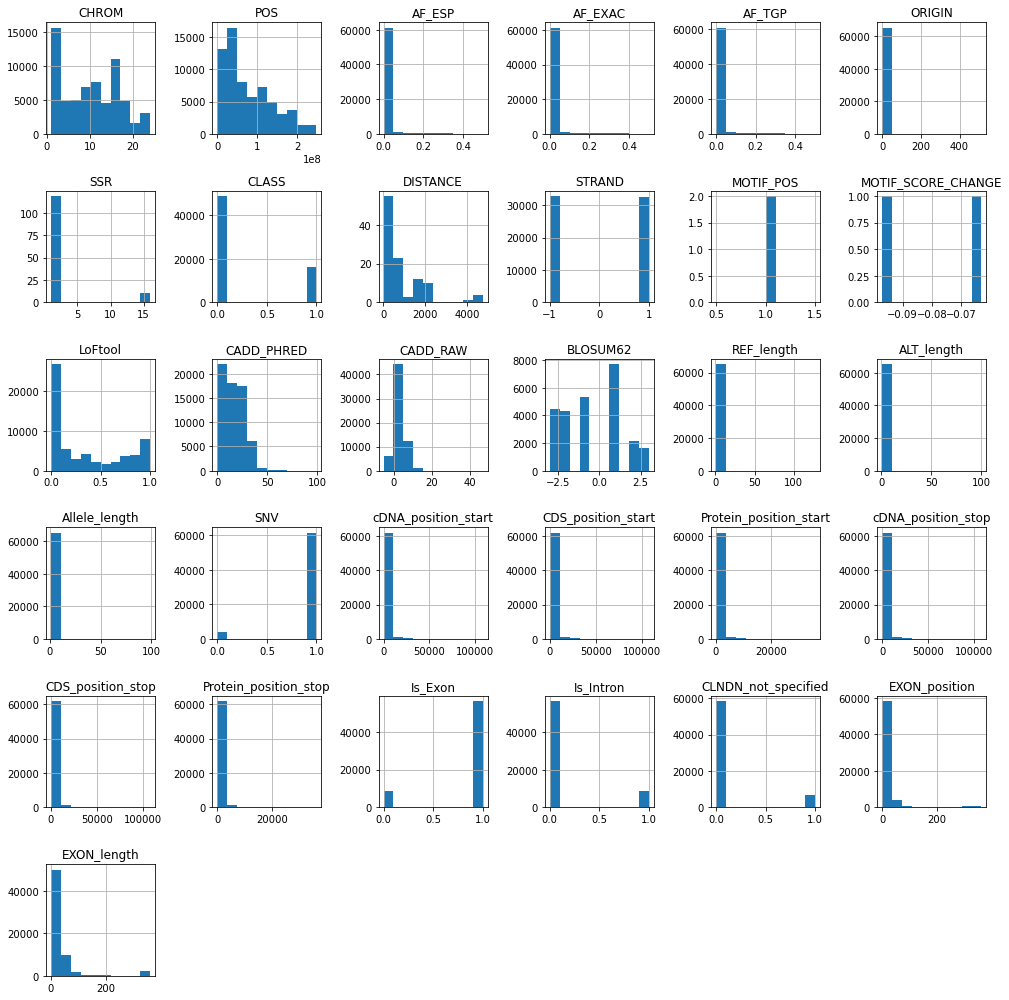

In [23]:
clinvar_transformed.hist(figsize=(14,14))
plt.tight_layout()
plt.savefig('clinv_trans.png')
plt.show()

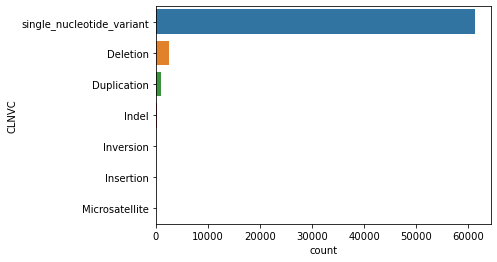

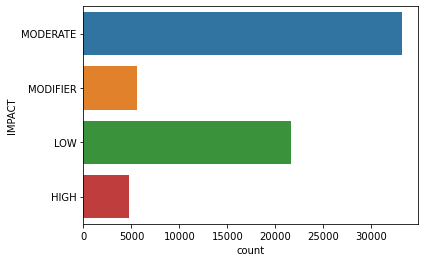

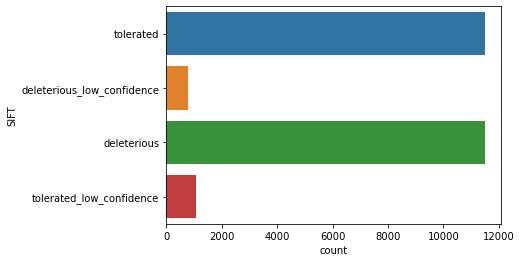

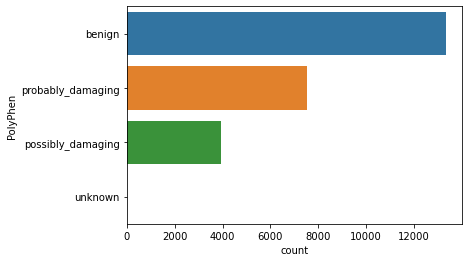

<Figure size 432x288 with 0 Axes>

In [24]:
features = ['CLNVC', 'IMPACT', 'SIFT', 'PolyPhen']

for feature in features:
    sns.countplot(y=feature, data=clinvar_transformed)
    plt.show()
plt.savefig('feature_clinv_trans.png')

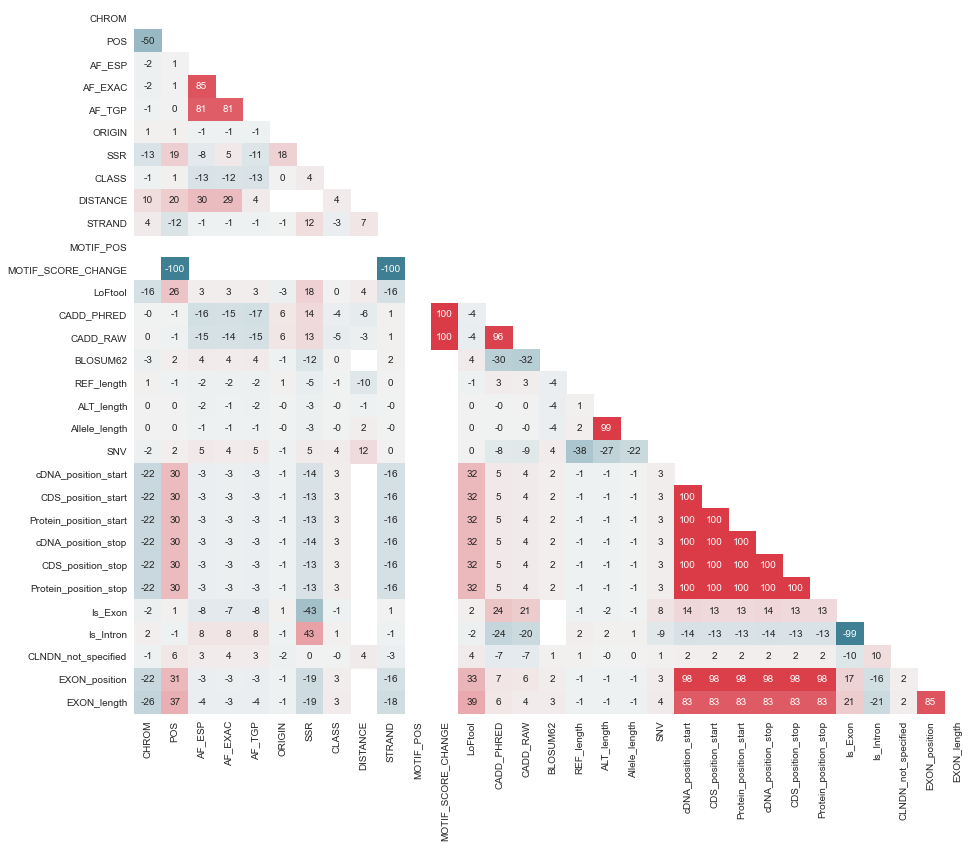

In [25]:
# Calculating the correlations between numeric features
correlations = clinvar_transformed.corr()

# Change color scheme
sns. set_style ("white")
# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Make the figsize 20 x 20
plt.figure(figsize=(15,13))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Plot heatmap of correlations
sns.heatmap(correlations * 100, annot=True, fmt='.0f', 
            mask=mask, cbar=False, cmap=cmap)

plt.show()

# Marchine Learning Algorithm (Data Preparation)

In [26]:
#SPlitting the dataset into training and test

X = clinvar_transformed[numeric_features + categorical_features]
y = clinvar_transformed.CLASS

def train_val_test_split(X, y):
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.2, random_state=111, stratify=y)
    X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=111, stratify=y_temp)
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y)

In [27]:
#Checking the shapes of the train and test dataset
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(13037, 32)
(26076, 32)
(26075, 32)


In [28]:
#To balance the dataset
def balance_training_set(X_train, y_train):
    X_temp = pd.concat([X_train, y_train], axis=1)
    balanced = pd.concat([X_temp, X_temp[X_temp.CLASS == 1], X_temp[X_temp.CLASS == 1]])
    return balanced.drop('CLASS', axis=1), balanced['CLASS']

X_train_balanced , y_train_balanced = balance_training_set(X_train, y_train)

print('1/0 CLASS ratio:', sum((y_train_balanced == 1).astype(int)) / len(y_train_balanced))

1/0 CLASS ratio: 0.5028300443628576


In [29]:

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out


In [30]:
class EncodeNonNumericValues(BaseEstimator, TransformerMixin):
    def __init__(self, consequence_list):
        self.comment_ = 'Get feature matrix from Consequence and use CategoricalEncoder for the rest'
        self.consequence_list = consequence_list
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        
        consequene_vectorizer = CountVectorizer(binary=True, vocabulary=self.consequence_list)
        consequene_matrix = consequene_vectorizer.fit_transform(X_copy['Consequence'])
        
        consequence_df = pd.DataFrame(consequene_matrix.toarray(), columns=consequene_vectorizer.get_feature_names())
        
        symbol_pathways = pd.read_csv('Symbol_Pathways.csv')
        pathways = symbol_pathways['Pathway identifier'].unique()
        
        pathways_vectorizer = CountVectorizer(binary=True, vocabulary=pathways)
        pathways_matrix = pathways_vectorizer.fit_transform(X_copy['Pathways'].values.astype('U'))
        pathways_df = pd.DataFrame(pathways_matrix.toarray(), columns=pathways_vectorizer.get_feature_names())
        pathways_df.fillna(0, inplace=True)
        
        categorical_encoder = CategoricalEncoder(encoding='onehot-dense')
        ordinal_encoder = CategoricalEncoder(encoding='ordinal')
        
        impact_encoded = pd.DataFrame(ordinal_encoder.fit_transform(X_copy.IMPACT.values.reshape(-1, 1)))
        X_copy = categorical_encoder.fit_transform(X_copy.drop(['Consequence', 'IMPACT', 'Pathways'], axis=1))
        
        return pd.concat([pd.DataFrame(X_copy), consequence_df, impact_encoded, pathways_df], axis=1)

In [31]:
class ImputeCategoricalValues(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.comment_ = 'Custom categorical imputer'
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_copy = X.copy() # needed to prevent the subsequent code from overriding original dataframe
        
        X_copy['Bam_edit_was_missing'] = X_copy.BAM_EDIT.isnull()
        X_copy['Sift_was_missing'] = X_copy.SIFT.isnull()
        X_copy['PolyPhen_was_missing'] = X_copy.PolyPhen.isnull()
        X_copy['BLOSUM62_was_missing'] = X_copy.BLOSUM62.isnull()
        
        # Since only 14 "strands" are imputed, 'Strand_was_missing' indicator won't be created
        # Impute with most frequent value: -1
        X_copy.STRAND.fillna(-1, inplace=True)
        
        # As half of the records does not contain BAM_EDIT, impute 'Unknown' value
        X_copy.BAM_EDIT.fillna('Unknown', inplace=True)
        
        # Impute 'Unknown'
        X_copy.SIFT.fillna('Unknown', inplace=True)
        
        # Impute 'Unknown'
        X_copy.PolyPhen.fillna('Unknown', inplace=True)
        
        # Impute 'Unknown'
        X_copy.BLOSUM62.fillna('Unknown', inplace=True)
        X_copy.BLOSUM62 = X_copy.BLOSUM62.astype(str)
        
        return X_copy

In [32]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attribute_names]

In [33]:
categorical_pipeline = Pipeline([
    ('selector', DataFrameSelector(categorical_features)),
    ('impute_category', ImputeCategoricalValues()),
    ('cat_encoder', EncodeNonNumericValues(clinvar_transformed.Consequence.unique()))
])

In [34]:
from sklearn.impute import SimpleImputer

numeric_pipeline = Pipeline([
    ('selector', DataFrameSelector(numeric_features)),
    ('impute_numeric', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])
full_pipeline = FeatureUnion(transformer_list=[
    ('categorical_pipeline', categorical_pipeline),
    ('numeric_pipeline', numeric_pipeline)
])



In [44]:
X_train_prepared = full_pipeline.fit_transform(X_train_balanced)
X_val_prepared = full_pipeline.transform(X_val)
X_test_prepared = full_pipeline.transform(X_test)
print(X_train_prepared.shape)
print(X_val_prepared.shape)
print(X_test_prepared.shape)

(19611, 270)
(26076, 271)
(26075, 272)


In [48]:
#import numpy as np
X_test_prepared = np.delete(X_test_prepared,(1), axis = 1)

X_val_prepared = np.delete(X_val_prepared,(1), axis = 1)

X_test_prepared = np.delete(X_test_prepared,(1), axis = 1)

X_test_prepared.shape
X_val_prepared.shape
X_train_prepared

(26076, 270)

# Training & Choosing a Model

In [49]:

def plot_roc_curve(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    fig = plt.figure(figsize=(8,8))
    plt.title('Receiver Operating Characteristic')

    plt.plot(fpr, tpr, label='l1')
    plt.legend('lower right')

    plt.plot([0, 1], [0, 1], 'k--')

    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    print('Area Under the Curve:', auc(fpr, tpr))

In [50]:
# Define function that reports results of 10-fold Cross-Validations
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [51]:

pipelines = {
    'rf': make_pipeline(SelectFromModel(RandomForestClassifier(random_state=12)), RandomForestClassifier(random_state=12)),
    'gb': make_pipeline(SelectFromModel(GradientBoostingClassifier(random_state=12)), GradientBoostingClassifier(random_state=12)),
    'decision_tree': make_pipeline(SelectFromModel(DecisionTreeClassifier(random_state=12)), DecisionTreeClassifier(random_state=12)),
}

In [52]:
rf_hyperparameters = {
    'randomforestclassifier__bootstrap': [True],
    'randomforestclassifier__max_depth': [4, 5],
    'randomforestclassifier__max_features': [4, 5],
    'randomforestclassifier__min_samples_leaf': [3, 4],
    'randomforestclassifier__min_samples_split': [8, 10],
    'randomforestclassifier__n_estimators': [100]
}

gb_hyperparameters = {
    'gradientboostingclassifier__max_depth': [4, 5],
    'gradientboostingclassifier__max_features': [4, 5],
    'gradientboostingclassifier__min_samples_leaf': [3, 4],
    'gradientboostingclassifier__min_samples_split': [8, 10],
    'gradientboostingclassifier__n_estimators': [100]
}

decision_tree_hyperparameters = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],
    'decisiontreeclassifier__max_depth': [ 6, 7, 8],
    'decisiontreeclassifier__max_features': [6, 7, 8]
}

In [53]:
hyperparameters = {
    'rf': rf_hyperparameters,
    'gb': gb_hyperparameters,
    'decision_tree': decision_tree_hyperparameters
}

In [54]:

fitted_models = {}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=12)

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=cv, scoring='roc_auc', 
                         verbose=50, n_jobs=-1)
    model.fit(X_train_prepared, y_train_balanced)
    
    fitted_models[name] = model
    print(name, 'has been fitted.')

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:  9.0min
[Paralle

[Parallel(n_jobs=-1)]: Done 107 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 111 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 115 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 117 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 119 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed: 22.1min
[Paralle

[Parallel(n_jobs=-1)]: Done  84 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done  85 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done  87 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done  91 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done  95 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done  99 tasks      | elapsed:   42.0s
[Paralle

In [55]:
# Best score for each model
for name, model in fitted_models.items():
    print( name, model.best_score_ )

rf 0.745509771988258
gb 0.8137567807302387
decision_tree 0.7304317190728653


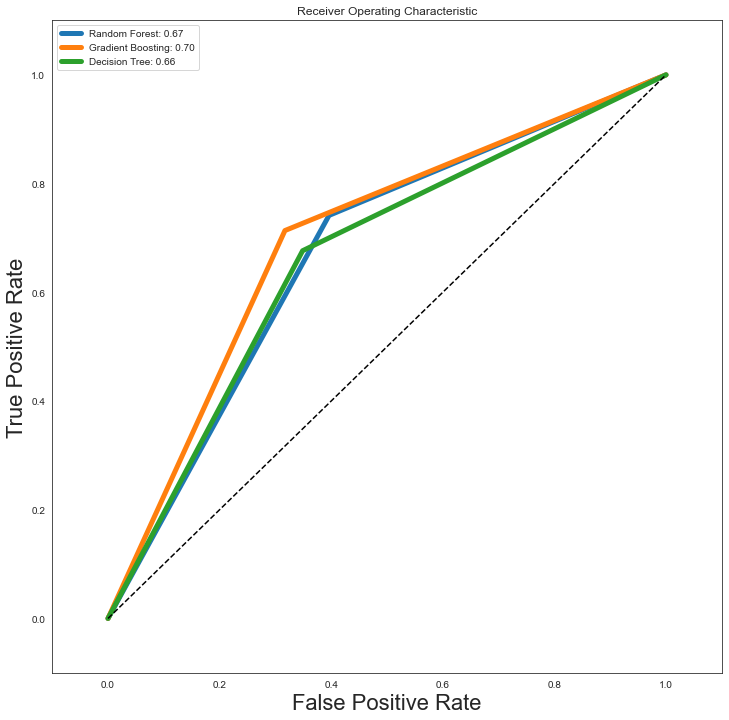

In [56]:
fig = plt.figure(figsize=(12,12))
list_of_models = {'rf': 'Random Forest', 'gb': 'Gradient Boosting', 'decision_tree': 'Decision Tree'}

for name, model in fitted_models.items():
    y_pred = fitted_models[name].best_estimator_.predict(X_val_prepared)
    fpr, tpr, thresholds = roc_curve(y_val, y_pred)
    
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s: %0.2f' % (list_of_models[name], roc_auc), linewidth=5)
    
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', fontsize=22)
plt.ylabel('True Positive Rate', fontsize=22)
plt.legend(loc=2)

plt.savefig('roc_curves.jpg')
plt.show()

In [57]:
from sklearn.metrics import accuracy_score

for name, model in fitted_models.items():
    y_pred = fitted_models[name].best_estimator_.predict(X_val_prepared)
    print(name, '\n', classification_report(y_val, y_pred))
    print(accuracy_score(y_val, y_pred))

rf 
               precision    recall  f1-score   support

           0       0.87      0.60      0.71     19502
           1       0.39      0.74      0.51      6574

    accuracy                           0.64     26076
   macro avg       0.63      0.67      0.61     26076
weighted avg       0.75      0.64      0.66     26076

0.6385565270747047
gb 
               precision    recall  f1-score   support

           0       0.88      0.68      0.77     19502
           1       0.43      0.71      0.54      6574

    accuracy                           0.69     26076
   macro avg       0.65      0.70      0.65     26076
weighted avg       0.76      0.69      0.71     26076

0.6906350667280258
decision_tree 
               precision    recall  f1-score   support

           0       0.86      0.65      0.74     19502
           1       0.40      0.68      0.50      6574

    accuracy                           0.66     26076
   macro avg       0.63      0.66      0.62     26076
weighted a

In [58]:
# Testing the most suitable model for the test

In [59]:
X_final_train = np.concatenate((X_train_prepared, X_val_prepared), axis=0)
y_final_train = pd.concat([y_train_balanced, y_val], axis=0)
print(X_final_train.shape)
print(y_final_train.shape)

(45687, 270)
(45687,)


In [60]:
# Best Parameters
fitted_models['gb'].best_params_

{'gradientboostingclassifier__max_depth': 5,
 'gradientboostingclassifier__max_features': 5,
 'gradientboostingclassifier__min_samples_leaf': 4,
 'gradientboostingclassifier__min_samples_split': 8,
 'gradientboostingclassifier__n_estimators': 100}

In [61]:
best_gb_params = {'gradientboostingclassifier__max_depth': [5],
                  'gradientboostingclassifier__max_features': [5],
                  'gradientboostingclassifier__min_samples_leaf': [4],
                  'gradientboostingclassifier__min_samples_split': [8],
                  'gradientboostingclassifier__n_estimators': [100]
                 }

final_gb_pipeline = make_pipeline(SelectFromModel(GradientBoostingClassifier()), 
                                  GradientBoostingClassifier(random_state=42))

best_gb = GridSearchCV(final_gb_pipeline, best_gb_params, cv=cv, scoring='roc_auc', 
                         verbose=50, n_jobs=-1)
best_gb.fit(X_train_prepared, y_train_balanced)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:   48.3s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:  1.6min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  1.6min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  1.6min remaining:   40.2s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:  1.6min remaining:   23.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=12, shuffle=True),
             estimator=Pipeline(steps=[('selectfrommodel',
                                        SelectFromModel(estimator=GradientBoostingClassifier())),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': [5],
                         'gradientboostingclassifier__max_features': [5],
                         'gradientboostingclassifier__min_samples_leaf': [4],
                         'gradientboostingclassifier__min_samples_split': [8],
                         'gradientboostingclassifier__n_estimators': [100]},
             scoring='roc_auc', verbose=50)

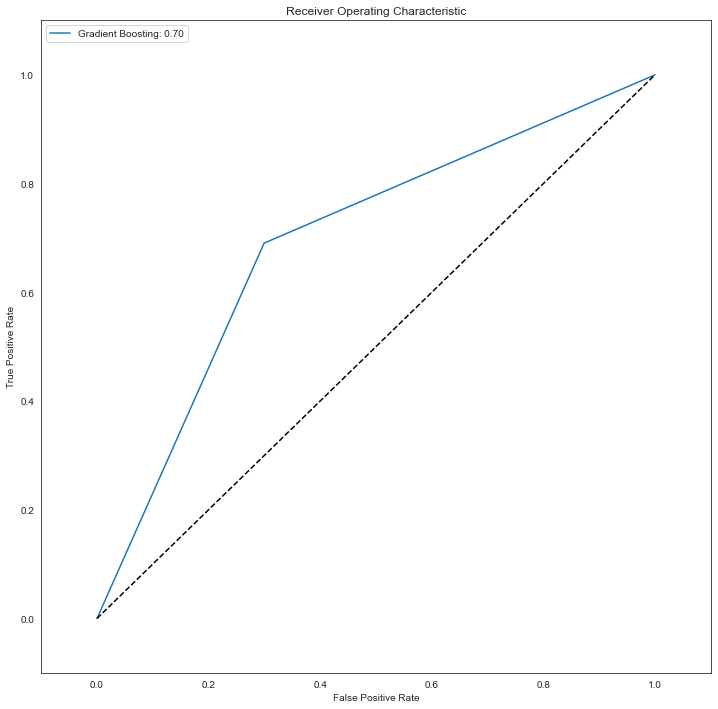

In [63]:
fig = plt.figure(figsize=(12,12))

y_pred = best_gb.predict(X_test_prepared)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='Gradient Boosting: %0.2f' % (roc_auc))
    
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=2)
plt.savefig('roc2_linear.jpg')
plt.show()

In [64]:
y_pred_test = best_gb.predict(X_test_prepared)
print(name, '\n', classification_report(y_test, y_pred_test))

decision_tree 
               precision    recall  f1-score   support

           0       0.87      0.70      0.78     19502
           1       0.44      0.69      0.54      6573

    accuracy                           0.70     26075
   macro avg       0.65      0.70      0.66     26075
weighted avg       0.76      0.70      0.72     26075



In [65]:
# Confusion matrix for the test set
print(confusion_matrix(y_test, y_pred_test))

[[13661  5841]
 [ 2035  4538]]


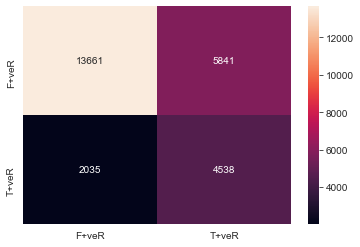

In [67]:
cm=confusion_matrix(y_test,y_pred_test)
ax=plt.subplot()
sns.heatmap(cm,annot=True,fmt='0.7g',ax=ax)
ax.xaxis.set_ticklabels(['F+veR','T+veR'])
ax.yaxis.set_ticklabels(['F+veR','T+veR'])
plt.savefig('cm_y_pred_test.jpg')

In [96]:
#y_pred_test2=MLPClassifier(solver='sgd',alpha=1e-5,hidden_layer_sizes=(20,20),random_state=1)
#y_pred_test2.fit(X_train_prepared, y_train_balanced)

In [97]:
#pred2=y_pred_test2.predict(X_test_prepared)
#pred2

In [98]:
# Confusion matrix for the test set
#print(confusion_matrix(y_test, pred2))

In [99]:
#print(classification_report(y_test,pred2))

In [100]:
#cm=confusion_matrix(y_test,pred2)
#ax=plt.subplot()
#sns.heatmap(cm,annot=True,fmt='0.7g',ax=ax)
#ax.xaxis.set_ticklabels(['F+veR','T+veR'])
#ax.yaxis.set_ticklabels(['T+veR','F+veR'])
#plt.savefig('cm_y_pred_test.jpg')

In [101]:
'''The final model yields an average Recall of 0.69, and a Recall of 
the positive class of 0.73. This means that out of the 6573 genetic 
variants with conflicting assessment in the test set our final model 
captures ca. 4800. Given the problem setting described above, we hope 
that this finding may be helpful for researchers and clinicians in identifying 
conflicting assessments of genetic variants. To further improve the prediction 
of genetic variants, one might try Support Vector Machines, Artificial Neural 
Networks, and Deep Learning. In addition, further preprocess- ing steps based 
on better domain knowledge might lead to additional performance improvements. 
In general, we hope that some of the ideas presented in this notebook will encourage
people to contribute and advance solution to the problem at hand'''

'The final model yields an average Recall of 0.69, and a Recall of \nthe positive class of 0.73. This means that out of the 6573 genetic \nvariants with conflicting assessment in the test set our final model \ncaptures ca. 4800. Given the problem setting described above, we hope \nthat this finding may be helpful for researchers and clinicians in identifying \nconflicting assessments of genetic variants. To further improve the prediction \nof genetic variants, one might try Support Vector Machines, Artificial Neural \nNetworks, and Deep Learning. In addition, further preprocess- ing steps based \non better domain knowledge might lead to additional performance improvements. \nIn general, we hope that some of the ideas presented in this notebook will encourage\npeople to contribute and advance solution to the problem at hand'

In [103]:
# END
print('THE END')

THE END
